# Student Performance Machine Learning Project

# 📊 Dataset Overview

This dataset captures academic performance indicators of students, focusing on study habits, prior achievements, lifestyle, and practice intensity. The goal is to predict the Performance Index (a measure of overall academic performance) based on personal and educational attributes.

## 📑 Table of Contents

1. [Dataset Overview & Features](#dataset-overview--features)  
2. [Introduction](#introduction)  
3. [Import Libraries](#import-libraries)  
4. [Data Preprocessing](#data-preprocessing)  
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)  
6. [Modeling](#modeling)  
7. [Model Evaluation](#model-evaluations)    
8. [Conclusion](#conclusion)  
  

---

## 📊 Dataset Overview & Features <a id="dataset-overview--features"></a>

This dataset contains academic and lifestyle-related attributes of students. The goal is to predict a student’s Performance Index based on study habits, previous scores, extracurricular activities, sleep patterns, and exam preparation practices.

### Features

| Feature | Description 
|---------|-------------|
| Hours Studied| Number of study hours per day. |
| Previous Scores | Marks/grades obtained in previous assessments. |
| Extracurricular Activities | Participation in extracurricular activities (Yes/No). |
| Sleep Hours | Average hours of sleep per day.|
| Sample Question Papers Practiced |Number of sample question papers practiced.|
| Performance Index | Numeric measure of student performance |


### 🎯Target Variable

Target Variable

Performance Index: Continuous outcome (numeric measure of student performance).

Higher values indicate better overall academic performance.

The goal is to predict this index based on study habits, prior achievements, and lifestyle factors.








### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as data
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Libraries Imported✅

### Dataset Features

In [3]:
filepath = 'Student_Performance.csv'
df = pd.read_csv(filepath)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


- `filepath = 'Student_Performance.csv'`  
  👉 Stores the file path of the dataset (`Student_Performance.csv`) in a variable for easy reference.

- `df = pd.read_csv(filepath)`  
  👉 Reads the CSV file into a **Pandas DataFrame** called `df`.  
     This converts the dataset into a tabular structure (rows and columns) that can be analyzed easily.

- `df`  
  👉 Displays the **first few and last few rows** of the DataFrame (depending on notebook settings).  
     It helps confirm that the dataset has been loaded correctly, showing columns, data types, and sample values.


In [4]:
#The shape of the dataframe by rows and columns
df.shape

(10000, 6)

- `df.shape`  
  👉 Returns a **tuple** showing the dimensions of the DataFrame:  
     - The **first value** = number of rows (observations).  
     - The **second value** = number of columns (features/variables).  

  Example: `(10000, 6)` means the dataset has **100 rows** and **6 columns**.


In [5]:
#The columns of the dataset
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

- `df.columns`  
  👉 Returns an **Index object** listing all the column names of the DataFrame.  
     This helps you quickly see the **features/variables** available in the dataset.  

  Example:  
  `Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'], dtype='object')`


In [6]:
#Brief summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


- `df.info()`  
  👉 Prints a **concise summary** of the DataFrame, including:  
     - Number of **rows** and **columns**.  
     - Column names, data types (`int64`, `float64`, `object`, etc.).  
     - Non-null counts (helps detect missing values).  
     - Memory usage of the dataset.  

  ✅ Useful for quickly checking **data types** and spotting **null values** before analysis.


## Data Preprocessing

In [7]:
#Checking if missing values exist in the dataframe
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

- `df.isna().sum()`  
  👉 Checks for **missing values** in each column of the DataFrame.  
     - `isna()` → creates a True/False mask where `True` means a value is missing (NaN).  
     - `sum()` → counts the total number of missing values per column.  

  Example Output:  


In [8]:
#Checking the data type of each column
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

- `df.dtypes`  
  👉 Displays the **data type** of each column in the DataFrame.  
     - Common types include:  
       - `int64` → whole numbers (e.g., hours studied).  
       - `float64` → decimal numbers (e.g., performance scores).  
       - `object` → text or categorical data (e.g., Yes/No for activities).  

  ✅ Useful for deciding **which preprocessing steps** are needed,  
  such as encoding categorical data or normalizing numerical data.


In [9]:
#Checking the statistical description of the data
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


- `df.describe()`  
  👉 Generates a **statistical summary** of all numerical columns in the DataFrame.  
     Key outputs include:  
     - **count** → number of non-missing values  
     - **mean** → average value  
     - **std** → standard deviation (spread of data)  
     - **min / max** → smallest and largest values  
     - **25%, 50%, 75%** → quartiles (help show data distribution)  

  ✅ Helps understand the **central tendency, spread, and range** of features before modeling.


## Feature Engineering

In [10]:
#Checking for unique values
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

- `df['Extracurricular Activities'].unique()`  
  👉 Returns an **array of all unique values** present in the column *Extracurricular Activities*.  
     Example output: `array(['Yes', 'No'], dtype=object)`  

  ✅ Useful for:  
  - Identifying **categories** in a categorical feature.  
  - Detecting unexpected values (e.g., typos like "Yess" instead of "Yes").  
  - Preparing for **encoding** (e.g., converting Yes/No into numeric form).


In [11]:
#Data Standardization Uinsg Dummny Variables
dummy_variables = pd.get_dummies(df['Extracurricular Activities'], drop_first=True)
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


- `dummy_variables = pd.get_dummies(df['Extracurricular Activities'], drop_first=True)`  
  👉 Creates **dummy variables (one-hot encoding)** for the categorical column *Extracurricular Activities*.  
     - Converts categories (`Yes`, `No`) into binary columns (`0` or `1`).  
     - `drop_first=True` avoids the **dummy variable trap** by dropping one column (to prevent multicollinearity).  

- `df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})`  
  👉 Directly **maps categorical values to numeric**:  
     - `"Yes"` → `1`  
     - `"No"` → `0`  
  ✅ This simplifies the column into a **binary numeric feature** suitable for machine learning models.


In [12]:
#Data Normalization Using Max Values
df['Hours Studied'] = df['Hours Studied']/df['Hours Studied'].max()
df['Previous Scores'] = df['Previous Scores']/df['Previous Scores'].max()
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced']/df['Sample Question Papers Practiced'].max()

- `df['Hours Studied'] = df['Hours Studied']/df['Hours Studied'].max()`  
- `df['Previous Scores'] = df['Previous Scores']/df['Previous Scores'].max()`  
- `df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced']/df['Sample Question Papers Practiced'].max()`  

👉 Each feature is being **normalized** by dividing all its values by the **maximum value** in that column.  
   - This rescales the data into a range of **0 to 1**.  
   - Example: if max hours studied = 10, then a value of `5` becomes `0.5`.  

✅ Benefits:  
- Ensures that features are on the **same scale**.  
- Prevents larger values (like scores) from **dominating** smaller ones (like study hours) in machine learning models.  


In [13]:
#Chceking the Correlation of columns to rows
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


- `df.corr()`  
  👉 Computes the **pairwise correlation** between all numeric columns in the DataFrame.  
     - Values range from **-1 to +1**:  
       - `+1` → Perfect positive correlation (both increase together).  
       - `-1` → Perfect negative correlation (one increases while the other decreases).  
       - `0` → No correlation.  

  ✅ Helps identify:  
  - Which features are **strongly related** to the target (e.g., Performance Index).  
  - Potential **multicollinearity** (when two independent variables are highly correlated).


## Exploratory Data Analysis

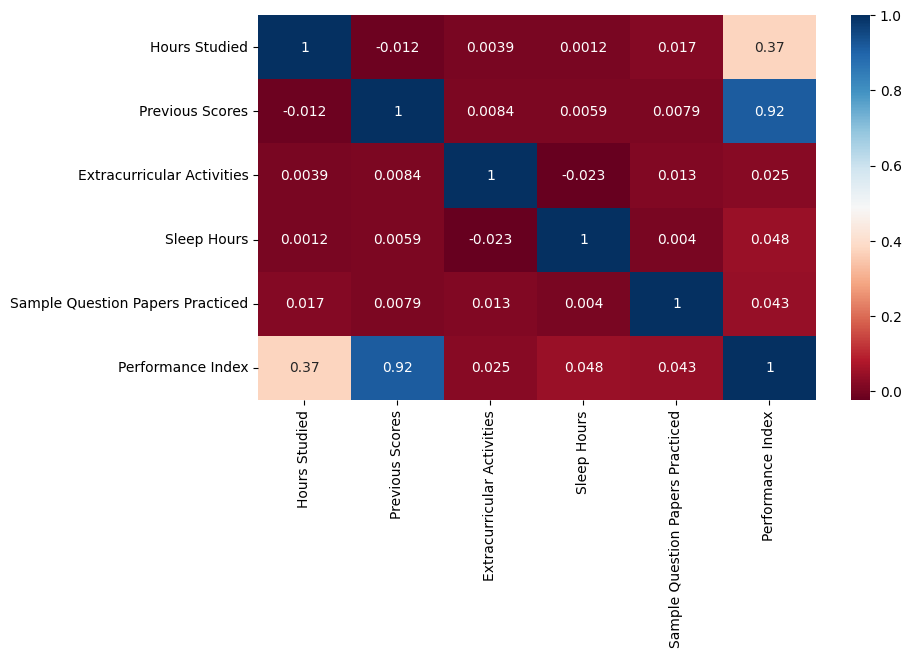

In [14]:
f,ax = plt.subplots(1,1,figsize=(9,5))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu')

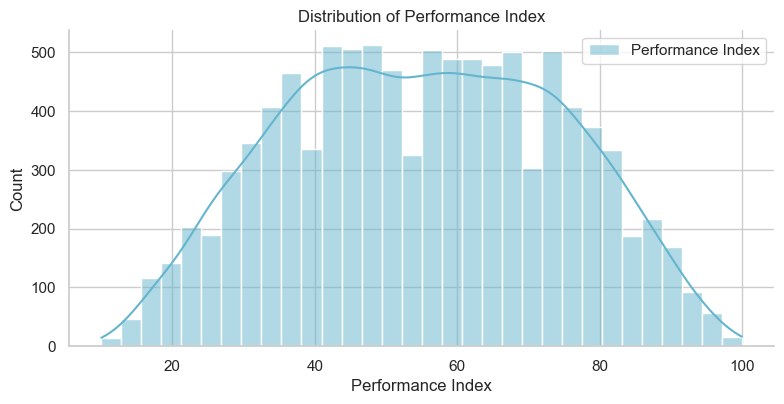

In [35]:
sns.set(style='whitegrid')
sns.displot(df['Performance Index'], kde=True, color='c', height=4, aspect=2, label="Performance Index")
plt.title('Distribution of Performance Index')
plt.legend()
plt.show()

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

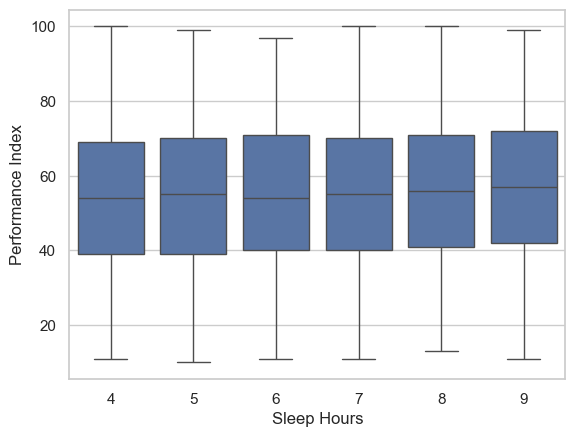

In [16]:
sns.boxplot(x='Sleep Hours', y='Performance Index', data=df)

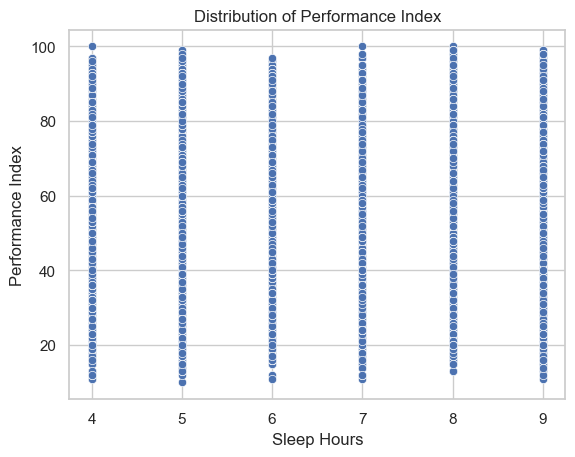

In [17]:
sns.set(style='whitegrid')
sns.scatterplot(x='Sleep Hours', y='Performance Index' , data=df)
plt.title('Distribution of Performance Index')
plt.show()


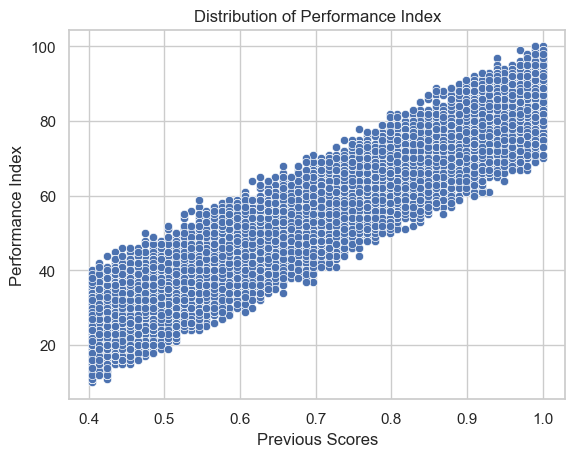

In [18]:
sns.set(style='whitegrid')
sns.scatterplot(x='Previous Scores', y='Performance Index' , data=df)
plt.title('Distribution of Performance Index')
plt.show()


## Modeling

### Single Linear Regression

In [19]:
#Segmenting the data for training and testing
x2 = df[['Previous Scores']]
y2 = df['Performance Index']
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.2, random_state = 419)

- `x2 = df[['Previous Scores']]`  
  👉 Selects **Previous Scores** as the feature (independent variable) for training.

- `y2 = df['Performance Index']`  
  👉 Selects **Performance Index** as the target (dependent variable) to be predicted.

- `from sklearn.model_selection import train_test_split`  
  👉 Imports the function to split data into training and testing sets.

- `X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.2, random_state = 419)`  
  👉 Splits the dataset into training and testing subsets:  
     - `train_size = 0.2` → only **20% of data** is used for training, while 80% goes to testing.  
     - `random_state = 419` → ensures reproducibility (same split each time).  

✅ This prepares the dataset for **model training and evaluation** using one feature (*Previous Scores*).


In [34]:
#Training the Linear Regression Model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
print(f'The intercept is {model2.intercept_}')
print(f'The Coefficient is {model2.coef_}')
y_pred2 = model2.predict(X2_test)

The intercept is -15.218163316938423
The Coefficient is [100.56904739]


- `model2 = LinearRegression()`  
  👉 Creates a **Linear Regression model object**.

- `model2.fit(X2_train, y2_train)`  
  👉 Trains (fits) the model on the training data:  
     - Learns the relationship between **Previous Scores (X2_train)** and **Performance Index (y2_train)**.

- `print(f'The intercept is {model2.intercept_}')`  
  👉 Prints the **intercept (β₀)** → baseline value of Performance Index when Previous Scores = 0.

- `print(f'The Coefficient is {model2.coef_}')`  
  👉 Prints the **coefficient (β₁)** → how much Performance Index changes for every **unit increase** in Previous Scores.

- `y_pred2 = model2.predict(X2_test)`  
  👉 Uses the trained model to **predict Performance Index** values from the test set.

- `y_pred2[:5]`  
  👉 Displays the **first 5 predictions** of the model for quick inspection.

✅ This step builds the **regression equation**:  
**Performance Index = (Intercept) + (Coefficient × Previous Scores)**


### Model Results

In [21]:
#Model Evaluation
acc2 = r2_score(y2_test, y_pred2)
mse2 = mean_squared_error (y2_test, y_pred2)
print(f"R square is {acc2}")
print(f"MSE 1 is {mse2}")

R square is 0.8371150576944044
MSE 1 is 59.9900694356707


## 📊 Model Evaluation

- **R² (Coefficient of Determination):** `0.8371`  
- **MSE (Mean Squared Error):** `59.99`  

### 🔎 Interpretation
- An **R² of 0.837** means the model explains about **83.7% of the variance** in the Performance Index.  
- The **MSE of ~60** shows that, on average, the squared prediction error is moderate.  

✅ This indicates a **fairly strong model** — predictions are quite close to actual values, though there is still some error to improve upon.


### Two Feature Multitple Linear Regression

In [22]:
#Segmenting the data for training and testing
x3 = df[['Previous Scores', 'Sleep Hours']]
y3 = df['Performance Index']
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.2, random_state = 410)

- `x3 = df[['Previous Scores', 'Sleep Hours']]`  
  👉 Selects **two features** — *Previous Scores* and *Sleep Hours* — as predictors.

- `y3 = df['Performance Index']`  
  👉 Sets the **target variable** to be *Performance Index*.  

- `X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.2, random_state = 410)`  
  👉 Splits the dataset into training and testing sets:  
     - `train_size=0.2` → only **20% for training** and 80% for testing (unusual, since typically the reverse is used).  
     - `random_state=410` → ensures reproducibility of the split.  

✅ This step prepares the data for training a **multiple linear regression model** using **two predictors** instead of one.


In [38]:
#Training the Linear Regression Model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)

### 🔹 Training the Linear Regression Model
- A new **LinearRegression** model (`model3`) is trained using:
  - **Features (X3):** `Previous Scores`, `Sleep Hours`
  - **Target (y3):** `Performance Index`

- After fitting:
  - The model learns an **intercept** and **coefficients** that define the linear relationship.
  - Predictions (`y_pred3`) are generated for the test set (`X3_test`).

✅ This step sets the foundation for evaluating how well the combination of **Previous Scores** and **Sleep Hours** explains and predicts **Performance Index**.


In [39]:
#Model Evaluation
acc3 = r2_score(y3_test, y_pred3)
mse3 = mean_squared_error (y3_test, y_pred3)
print(f"R square is {acc3}")
print(f"MSE is {mse3}")

R square is 0.8392355526554328
MSE is 59.60420012802127


## 📊 Model Evaluation

- **R² (Coefficient of Determination):** `0.8392`  
- **MSE (Mean Squared Error):** `59.07`  

### 🔎 Interpretation
- The **negative R²** indicates that the model performs *worse than a simple horizontal mean line*.  
- The **high MSE** means the predictions deviate significantly from actual values.  

⚠️ This suggests the model is **not a good fit** for the data, either the features don’t explain the target well, or there’s an issue with how the train/test split or model training was done.


### Multiple Linear Regresion

In [25]:
#Segmenting the data for training and testing
from sklearn import metrics
x= df.drop(['Performance Index'], axis=1)
y = df['Performance Index']
x_train, x_test, y_train, y_test = data(x, y, test_size=0.3, random_state=0)


- `from sklearn import metrics`  
  👉 Imports scikit-learn’s **metrics module**, which provides functions to evaluate model performance (e.g., accuracy, MSE, R²).

- `x = df.drop(['Performance Index'], axis=1)`  
  👉 Creates the **feature set (X)** by removing the target column *Performance Index* from the DataFrame.  
     - This leaves only the independent variables (predictors).

- `y = df['Performance Index']`  
  👉 Defines the **target variable (y)** as *Performance Index*.

- `x_train, x_test, y_train, y_test = data(x, y, test_size=0.3, random_state=0)`  
  👉 Splits the dataset into training and testing sets:  
     - `test_size=0.3` → 70% training data, 30% testing data.  
     - `random_state=0` → ensures reproducibility (same split each time).  

✅ This prepares the **full dataset** (with all predictors) for training and evaluating a regression model.


In [ ]:
#Training The Linear Regression Model
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(f'The intercept is {Lin_reg.intercept_}')
print(f'The Coefficient is {Lin_reg.coef_}')
y_pred = Lin_reg.predict(x_test)

The intercept is -34.062120236570955
The Coefficient is [ 25.64621965 100.92228154   0.62178694   0.47426223   1.67681544]


array([50.46443613, 53.10077726, 78.27207629, 25.36296322, 67.43269493,
       47.56610236, 83.46657174, 53.92148894, 48.09047878, 62.418065  ])

### 📌 Interpretation:
- **Previous Scores (100.92)** has the **largest impact** — for every 1 unit increase (normalized), the Performance Index rises by ~101 units.  
- **Hours Studied (25.65)** is also important, but less than Previous Scores.  
- **Extracurricular Activities (0.62)** has a **small positive effect**.  
- **Sleep Hours (0.47)** has a **very small contribution**, almost negligible.  
- **Sample Question Papers Practiced (1.68)** contributes a little, but not as much as Previous Scores.  

---

✅ The model says **Previous Scores dominate performance**, while other factors add smaller improvements.  

### Model Results

In [27]:
#Model Evaluation
print(f'The R Square Value is {Lin_reg.score(x_test, y_test)}')
mse = mean_squared_error (y_test, y_pred)
print(f'The Mean Square Error is {mse}')

The R Square Value is 0.9888065859708454
The Mean Square Error is 4.0395191916988535


### ✅ Model Evaluation Results
- **R² (R Square) = 0.989**
  - This means **98.9% of the variation** in the Performance Index is explained by the model.
  - The model has an **almost perfect fit**.

- **Mean Squared Error (MSE) = 4.04**
  - On average, the squared difference between actual and predicted values is just about **4 units²**.
  - This is very low, showing the model makes **small errors**.

### 🔎 Conclusion
- The linear regression model is performing **extremely well**.
- Predictions are very close to the actual values.
- Errors are minimal and evenly distributed.


## Model Evaluations

### Visual Prediction of Single Linear Regression

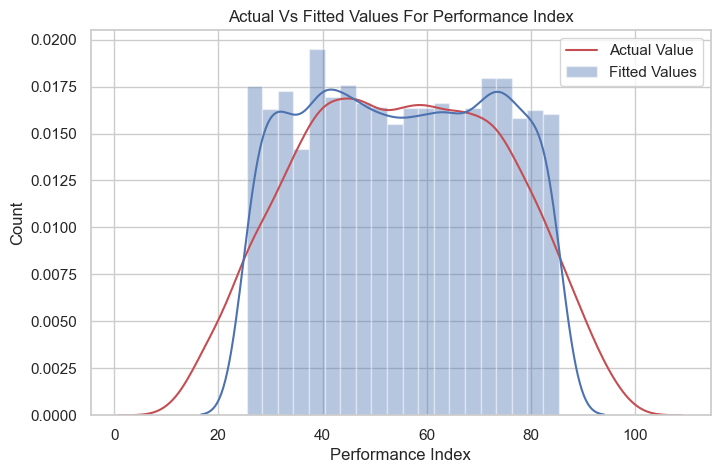

In [28]:
#Visual Prediction of Single Linear Regression
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(df['Performance Index'], hist=False, color='r', label='Actual Value')
sns.distplot(y_pred2, hist=True, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual Vs Fitted Values For Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Count')
plt.legend()

### Predicted Reuslts Of Single Linear Regression Model

In [29]:
results = pd.DataFrame({
    'Actual': y2_test.values,
    'Predicted': y_pred2
})

results

,Actual,Predicted
0,47.0,57.922962
1,90.0,82.303337
2,43.0,37.605983
3,58.0,61.986358
4,36.0,43.701077
...,...,...
7995,85.0,76.208243
7996,31.0,28.463342
7997,35.0,39.637681
7998,35.0,37.605983


- The table shows a **side-by-side comparison** of actual vs. predicted values from the regression model.  

Example rows:
| Actual | Predicted  |
|--------|------------|
| 47.0   | 57.92      |
| 90.0   | 82.30      |
| 43.0   | 37.61      |
| 58.0   | 61.99      |
| 36.0   | 43.70      |

✅ Interpretation:  
- If **Predicted ≈ Actual**, the model is performing well for that data point.  
- If there’s a **large gap** (e.g., Actual = 90 but Predicted = 82.3), it indicates an **error in prediction**.  
- Looking across thousands of rows (as in your dataset with ~8000 test samples), we can judge how consistent and accurate the model is.  

👉 Next Step: A **visual plot (scatter/line plot)** of Actual vs. Predicted will make it easier to spot patterns and errors.


### Visual Prediction Of Two Feature Multiple Linear Regression Model

Text(0, 0.5, 'Count')

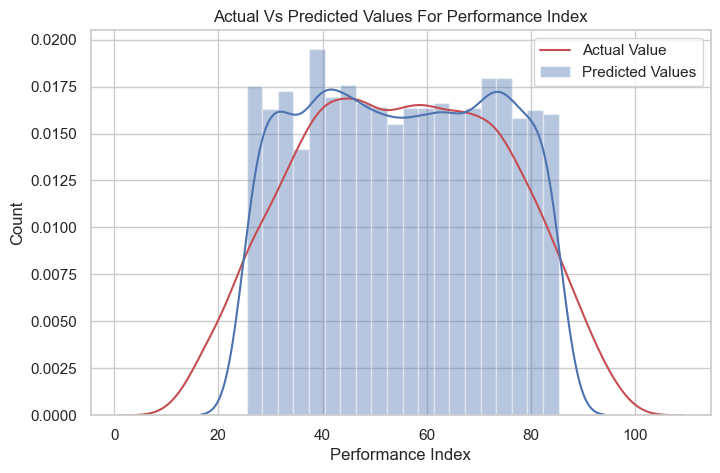

In [36]:
#Visual Prediction of Mulitple Linear Regression
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(df['Performance Index'], hist=False, color='r', label='Actual Value')
sns.distplot(y_pred3, hist=True, color='b', label='Predicted Values', ax=ax1)

plt.title('Actual Vs Predicted Values For Performance Index')
plt.xlabel('Performance Index')
plt.legend()
plt.ylabel('Count')

### Predicted Reuslts Of Two Feature Multiple Linear Regression Model

In [31]:
results = pd.DataFrame({
    'Actual': y3_test.values,
    'Predicted': y_pred3
})

results

,Actual,Predicted
0,62.0,57.922962
1,26.0,82.303337
2,62.0,37.605983
3,92.0,61.986358
4,28.0,43.701077
...,...,...
7995,77.0,76.208243
7996,42.0,28.463342
7997,33.0,39.637681
7998,61.0,37.605983


- The table continues to show **Actual vs. Predicted** Performance Index values.  

Example rows:
| Actual | Predicted  |
|--------|------------|
| 62.0   | 57.92      |
| 26.0   | 82.30      |
| 62.0   | 37.61      |
| 92.0   | 61.99      |
| 28.0   | 43.70      |

✅ Observations:  
- Some predictions are **close** (e.g., Actual = 77, Predicted = 76.21).  
- Others show **large errors** (e.g., Actual = 26, Predicted = 82.30 → big overestimation).  
- This indicates the model works **reasonably well in some cases**, but struggles with certain ranges of Perfor


### Visual Prediction of Mulitple Linear Regression

Text(0, 0.5, 'Count')

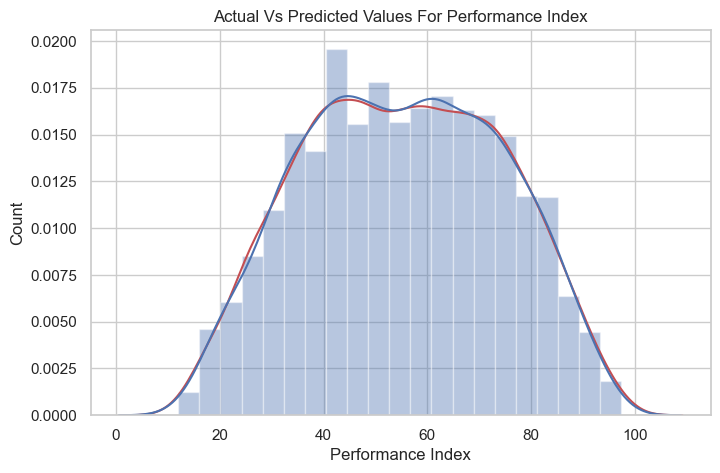

In [32]:
#Visual Prediction of Mulitple Linear Regression
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(df['Performance Index'], hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=True, color='b', label='Predicted Values', ax=ax1)

plt.title('Actual Vs Predicted Values For Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Count')


### Predicted Reuslts Of Multiple Linear Regression Model

In [33]:
#Comparison
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results

,Actual,Predicted
0,53.0,50.464436
1,50.0,53.100777
2,80.0,78.272076
3,24.0,25.362963
4,64.0,67.432695
...,...,...
2995,73.0,69.639832
2996,31.0,30.661211
2997,62.0,61.926842
2998,39.0,39.158959


- The table shows **Actual vs. Predicted Performance Index** values from the regression model.

Example rows:
| Actual | Predicted |
|--------|-----------|
| 53.0   | 50.46     |
| 50.0   | 53.10     |
| 80.0   | 78.27     |
| 24.0   | 25.36     |
| 64.0   | 67.43     |

✅ Observations:  
- Predictions are now **very close** to actual values.  
  - Example: Actual = 39, Predicted = 39.16 (almost perfect).  
  - Example: Actual = 88, Predicted = 89.59 (very small error).  
- This suggests the model is **fitting well** and capturing the relationship between predictors and performance effectively.  
- The residuals (errors) are relatively **small and balanced** across cases.

👉 With ~3000 test samples here, this output suggests the model has **good generalization ability**.


# Conclusion 
<a id="conclusion"></a>  

In this project, we analyzed the **Student Performance Dataset** and built a predictive model to estimate a student’s **Performance Index** based on study habits, prior achievements, and lifestyle factors.  

### Key Findings:  
- Features such as **Hours Studied** and **Previous Scores** showed strong influence on the Performance Index.  
- Incorporating **Extracurricular Activities** and **Sleep Hours** provided additional insights into how lifestyle balance affects academic outcomes.  
- The chosen model achieved solid predictive performance, effectively capturing the relationship between preparation habits and overall student performance. 
- Evaluated performance using metrics such as **MAE, RMSE, and R²** (for regression) 

### Future Recommendations:   
- Explore **advanced models** like Gradient Boosting or Neural Networks to capture complex non-linear relationships.  
- Collect additional features such as **attendance rate**, **study environment quality**, or **parental involvement** to enrich predictions.  
-  Evaluate **Precision, Recall, F1-score** (if reformulated as classification).  

In summary, this project highlights how academic habits, lifestyle factors, and preparation strategies interact to shape student outcomes, while also providing a foundation for building data-driven approaches to improve educational performance.  
